# Convolutional Neural Network From Scratch

This notebook contains how to implement a convolutional neural network to detect digits from scratch. **Only using numpy**. Just for learning/teaching purposes.


**Convolutional networks** emerged from the study of the brain's visual cortex, and they have been used in image recognition since the 1980s. As David H.Hubel and Torsten Wiesel showed in a series of experiments on cats and monkeys, many neurons in the visual cortex react only to visual stimuli located in a limited region of the visual field. Moreover, they showed that some neurons react only to images of horizontal/vertical lines, while others react to more complex patters that are combinations of the lower-level patterns. This idea is present in the architecture of the CNN which is able to detect all sort of complex patterns in any area of the visual field.



In [ ]:
import random

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image #to read images
from tqdm import tqdm 
from keras.datasets import mnist #import dataset
from keras.utils import to_categorical #for example: 3 -> [0,0,0,1,0,0,0,0,0,0]
from matplotlib.pyplot import imshow

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Check the dataset and preprocess



Label of the photo [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Length of dataset:
 	 Training set: 60000
 	 Test set: 10000
Shape of the image:(1, 28, 28)


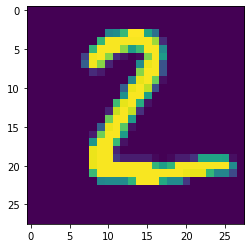

In [ ]:
def display_array(data):
  img = Image.fromarray(data) 
  imshow(img)

display_array(x_test[1])

# Let's do a reshape data to fit model and insert the channel 
x_train = x_train.reshape(60000, 1, 28,28)
x_test = x_test.reshape(10000,1, 28,28)


# We need to transform our target to a one-hot encode column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('Label of the photo {}'.format(y_test[1]))
print('Length of dataset:\n \t Training set: {}\n \t Test set: {}'.format(len(x_train), len(x_test)))
print('Shape of the image:{}'.format(x_train[0].shape))

## Convolution Implementation

The CNN rather than focus on one pixel at time, it takes in square patches of pixels and pass them through a filter, this operation is called **convolution**. The job of the filter is to find patterns in the pixels. Moreover, it is possible to connect a large input layer to a much smaller layer by spacing out (horizontally or vertically) how the pixels are passed through the filter (that space is called *stride*). 


![alt text](https://cdn-images-1.medium.com/max/1000/1*-OM6jQTMNACDX2vAh_lvMQ.png)




In [ ]:
def fconvolution(x, stride, filters, bias):
  cache = (x, filters, bias, stride)
  #every x has Number, Channel, Height, Width
  N, C, H, W = x.shape
  #one filter has Number, Height, Width
  F, H_f, W_f = filters.shape
  # adding 1 and substracting dimensions of filters for the cases where it falls short
  W_out = 1 + ((W-W_f) // stride)
  H_out = 1 + ((H-H_f) // stride)
  out = np.zeros((N, F, H_out, W_out))
  for n in range(N):
    for f in range(F):
      for h in range(0, H-H_f, stride): 
        for w in range(0, W-W_f, stride):
          result = np.sum(np.multiply(filters[f], x[n,:, h:h+stride,w:w+stride])) + bias[f]
          out[n, f, h//stride, w//stride] = result
  return out, cache

### Testing a forward convolution

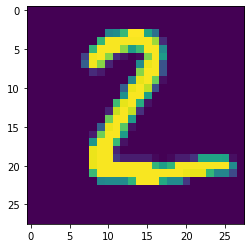

In [ ]:
# ORIGINAL
display_array(x_test[1][0])

(64, 10, 10)
(5, 64, 19, 19)


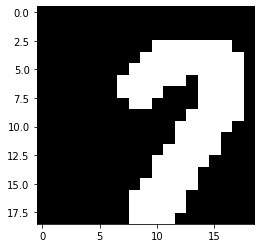

In [ ]:
#INTIALIZING FILTERS AND BIAS
FILTERS_test = np.array([np.random.rand(10,10) for _ in range(64)])
bias_test = np.random.rand(64)
print(FILTERS_test.shape)

# FORWARD CONVOLUTION
out0, _ = fconvolution(x_test[0:5],1,FILTERS_test,bias_test)

print(out0.shape)
display_array(out0[1][10])

## Max Pooling Implementation

Another main component for a  *CNN* is the **Pooling Layer**. Similar to the Convolutional Layer, the Pooling Layer is responsible for reducing the spatial size of the convolved feature. It is a nice way to take large images and shrink them down while preserving the most information in them.  This it to decrease the computational power required to process the data through dimensionality reduction. All it does is aggregate the inputs using an aggregation function such as the max or mean. For this layer the stride and the padding style must be defined too like in the Convolutional Layer. In this case we have implemented the max pooling layer.



![alt text](https://i.stack.imgur.com/6WbWu.png)

In [ ]:
def max_pooling(x, pooling_shape, stride):
  N, C, H, W = x.shape
  H_p, W_p = pooling_shape
  W_out = (W - W_p) // stride + 1
  H_out = (H - H_p) // stride + 1
  out = np.zeros((N, C, H_out, W_out))

  for n in range(N):
    for h in range(0, H-H_p, stride): 
      for w in range(0, W-W_p, stride):
        out[n,:,h,w]= np.max(x[n,:, h:h+H_p, w:w+W_p,])
        # print('Every shape = {}'.format(out.shape))
  
  return out, x

### Testing a forward max pooling

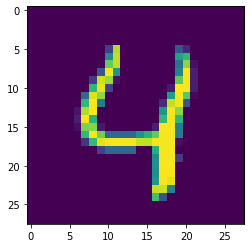

In [ ]:
# ORIGINAL
display_array(x_test[4][0])

(5, 1, 28, 28)


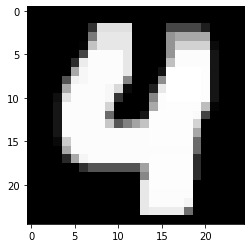

In [ ]:
pooling_shape = (4,4)
stride = 1

# FORWARD CONVOLUTION
print(x_test[0:5].shape)
out0, _ = max_pooling(x_test[0:5],pooling_shape,stride)

# CONVOLUTED
display_array(out0[4][0])

# ACTIVATION FUNCTIONS

Activation functions decide whether a neuron should be activated or not by applying some operations at the output of the previous step. 

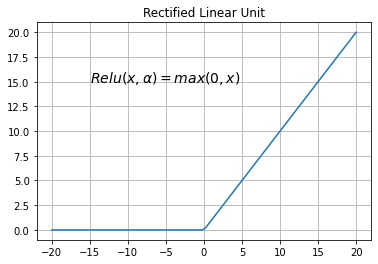

In [ ]:
def relu(x):
  return np.maximum(x, 0)

x = np.linspace(-20, 20, 100)
plt.plot(x, relu(x))
plt.grid()
plt.text(-15,15,r'$Relu(x, \alpha)=max(0, x)$',fontsize=14)
plt.title('Rectified Linear Unit')


def drelu(x):
  if x < 0:
    return 0
  else:
    return 1

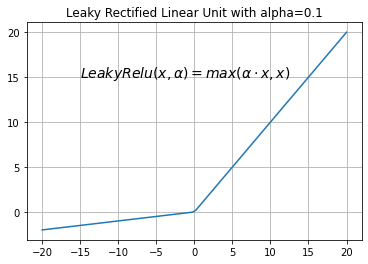

In [ ]:
def leaky_relu(x, alpha=0.01):
  return np.maximum(alpha*x, x)
    

x = np.linspace(-20, 20, 100)
plt.plot(x, leaky_relu(x, 0.1))
plt.grid()
plt.text(-15,15,r'$LeakyRelu(x, \alpha)=max(\alpha \cdot x, x)$',fontsize=14)
plt.title('Leaky Rectified Linear Unit with alpha=0.1')


def d_leaky_relu(x):
  if x < 0:
    return 0.01
  else:
    return 1

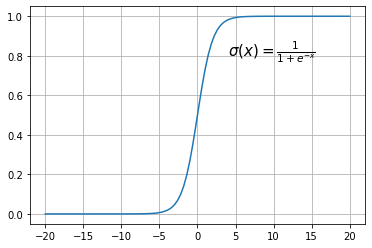

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


x = np.linspace(-20, 20, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.grid()
plt.text(4,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=15)


def d_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))


# FULLY CONNECTED LAYER

The fully connected layer is used before the backpropagation process starts. It takes the output of a convolution and predicts the best label to describe the image. So it drives the final classification decision.

In [ ]:
def fully_connected(previous_layer, weights, bias):
  flattened_layer = np.array([i.flatten() for i in previous_layer])
  out = np.array([np.dot(i, weights) + bias  for i in flattened_layer])
  cache = (previous_layer, weights, bias)
  return out, cache

# SOFTMAX

This function is used in order to transform the output of the CNN into probability values that sum up to 1.

![alt text](https://miro.medium.com/max/906/1*670CdxchunD-yAuUWdI7Bw.png)

In [ ]:
def softmax(raw_result):
  aux = np.array([np.exp(i) for i in raw_result])
  return np.array([i/np.sum(i) for i in aux])

# BACKPROPAGATION
![alt text](https://miro.medium.com/max/567/1*MZfsVCVBF9pgpVKFQ5Q8PQ.png)
![alt text](https://miro.medium.com/max/400/1*ioefE_aGDkz2Bik-qJlMoA.png)




In [ ]:
#BACKWARD PASS FOR CONVOLUTION
def backpropagation_conv(prev, cache):
  x, filters, b, stride = cache

  dx = np.zeros(x.shape)
  df = np.zeros(filters.shape)
  db = np.zeros(b.shape)

  N, C, H, W = x.shape
  F, hh, ww = filters.shape
  db = np.sum(prev, axis=(0,1))
  for n in range(N):
    for f in range(F):
      for h in range(0,H-hh, stride):
        for w in range(0, W-ww, stride):
          df[f, :, :] += np.sum(x[n, :, h:h+hh, w:w+ww] * prev[n, f, h:h+hh, w:w+ww], axis=0)
          dx[n, :, h:h+hh, w:w+ww] += filters[f, :, :] * prev[n, f, h:h+hh, w:w+ww]
  return dx, df, db


def backpropagation_fully_connected(output, ground_truth, cache):
  x, filters, bias = cache
  x_flattened = np.array([i.flatten() for i in x])
  print('Calculation of the cost')
  loss = np.array([MSE(output[i], ground_truth[i]) for i in range(len(output))])
  print('Starting to backpropagate with loss', np.mean(loss))
  
  error = MSE_derivative(output, ground_truth)
  dX = np.zeros(x_flattened.shape)
  dW = np.zeros(filters.shape)

  (f,f) = filters.shape
  dX = np.dot(error, filters.T)
  dW = np.dot(x.T, error)
  db = error

  return dX.reshape(x.shape), dW, db


# LOSSES

In [ ]:
def MSE(y, y_label):
  return np.mean(np.power(y_label-y, 2));


def MSE_derivative(y, y_label):
    return 2*(y-y_label)/y_label.size;

def MAE(y, y_label):
  return np.sum(np.absolute(y-y_label))


def cross_entropy_loss(y_label, y):
  return -np.sum(y_label*np.log(y))/y.shape[0]

In [ ]:
def transform_output_into_result(array):
      return list(map(lambda x: 0 if x != max(array) else 1, array))
      

# TRAINING

We have to take into account the activation functions


In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 2
NUM_FILTERS = 4
FILTERS = np.array([np.random.normal(loc=0, scale = 0.02, size = (2,2)) for _ in range(NUM_FILTERS)])
FILTERS1 = np.array([np.random.normal(loc=0, scale=0.02, size=(2,2)) for _ in range(NUM_FILTERS*2)])
STRIDE = 1
bias0 = np.random.rand(NUM_FILTERS)
bias1 = np.random.rand(NUM_FILTERS*2)
WEIGHT_FC = 0.01*np.random.rand(4608, 10)
bias_FC = np.random.rand(10)


# data to train: x_train and y_train
for j in range(EPOCHS):
  random.shuffle(x_train)
  for i in range(0,len(x_train), BATCH_SIZE):
    batch = x_train[i:i+BATCH_SIZE]/255.
    ground_truth = y_train[i:i+BATCH_SIZE]
    print('Entering', batch.shape)

    out0, cacheConv0 =fconvolution(batch,STRIDE,FILTERS,bias0)
    out01 = sigmoid(out0)
    print('Output after first Convolution', out01.shape)
    out1, cacheMax0 = max_pooling(out01,(2,2),1)
    print('Output after first Max Pooling', out1.shape)


    out2, cacheConv2 =fconvolution(out1,STRIDE,FILTERS1,bias1)
    out21 = sigmoid(out2)
    print('Output after second Convolution', out21.shape)
    out3, cacheMax3 = max_pooling(out21,(2,2),1)
    print('Output after second Convolution', out3.shape, '\n')
  
    out4, cache4 = fully_connected(out3, WEIGHT_FC, bias_FC)
    out41 = softmax(out4)

    print('Real\n', ground_truth[0:2])
    print('Predicted\n', [transform_output_into_result(i) for i in out41[0:2]])

    print('\n\n')
  
    # BACKPROPAGATE
    dx0, dw0, db0 = backpropagation_fully_connected(out41, ground_truth, cache4)
    print('Dx0',dx0.shape,'\nDw0', dw0.shape,'\nDbo', db0.shape)
    dx1, df1, db1 = backpropagation_conv(dx0, cacheConv2)
    print('Dx1', dx1.shape,'\nDf1', df1.shape,'\nDb1', db1.shape)
    dx2, df2, db2 = backpropagation_conv(dx1, cacheConv0)
    print('Dx2', dx2.shape,'\nDf2', df2.shape, '\nDb2',db2.shape)



    print('\n\nBefore')
    print('Weights FC', WEIGHT_FC.shape, '\nBias FC',bias_FC.shape)
    print('Filters 1',FILTERS1.shape,'\nBias 1', bias1.shape)
    print('Filters 0',FILTERS.shape,'\nBias 0', bias0.shape)

   
    
    #WEIGHT_FC = np.array([j - LEARNING_RATE*(i/BATCH_SIZE) for i, j in zip(dw0, WEIGHT_FC)])
    #bias_FC = np.array([j - LEARNING_RATE*(np.sum(i)/BATCH_SIZE) for i, j in zip(db0, bias_FC)])

    FILTERS1 = np.array([j - LEARNING_RATE*(i/BATCH_SIZE) for i, j in zip(df1, FILTERS1)])
    bias1 = np.array([j - LEARNING_RATE*(np.sum(i)/BATCH_SIZE) for i, j in zip(db1, bias1)])
    
    FILTERS = np.array([j - LEARNING_RATE*(i/BATCH_SIZE) for i, j in zip(df2, FILTERS)])
    bias0 = np.array([j - LEARNING_RATE*(np.sum(i)/BATCH_SIZE) for i, j in zip(db2, bias0)])

    print('\n\nAfter')
    print('Weights FC', WEIGHT_FC.shape, '\nBias FC',bias_FC.shape)
    print('Filters 1',FILTERS1.shape,'\nBias 1', bias1.shape)
    print('Filters 0',FILTERS.shape,'\nBias 0', bias0.shape)

    print('\n{} iteration done'.format(i+1))
  #   break
  # break

Streaming output truncated to the last 5000 lines.
Bias 0 (4,)

1467 iteration done
Entering (2, 1, 28, 28)
Output after first Convolution (2, 4, 27, 27)
Output after first Max Pooling (2, 4, 26, 26)
Output after second Convolution (2, 8, 25, 25)
Output after second Convolution (2, 8, 24, 24) 

Real
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Predicted
 [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]



Calculation of the cost
Starting to backpropagate with loss 0.08884578212681207
Dx0 (2, 8, 24, 24) 
Dw0 (24, 24, 8, 10) 
Dbo (2, 10)
Dx1 (2, 4, 26, 26) 
Df1 (8, 2, 2) 
Db1 (24, 24)
Dx2 (2, 1, 28, 28) 
Df2 (4, 2, 2) 
Db2 (26, 26)


Before
Weights FC (4608, 10) 
Bias FC (10,)
Filters 1 (8, 2, 2) 
Bias 1 (8,)
Filters 0 (4, 2, 2) 
Bias 0 (4,)


After
Weights FC (4608, 10) 
Bias FC (10,)
Filters 1 (8, 2, 2) 
Bias 1 (8,)
Filters 0 (4, 2, 2) 
Bias 0 (4,)

1469 iteration done
Entering (2, 1, 28, 28)
Output after first Convolution (2, 4, 27, 27)
Output af

KeyboardInterrupt: ignored

# EVALUATE
  

In [ ]:
def evaluate(image):
  out0, _ = fconvolution(image,STRIDE,FILTERS,bias0)
  out01 = relu(out0)
  out1, cacheMax0 = max_pooling(out01,(2,2),1)
  out11 = relu(out1)

  out2, _ = fconvolution(out1,STRIDE,FILTERS1*2,bias1)
  out21 = relu(out2)
  out3, _ = max_pooling(out2,(2,2),1)
  out31 = relu(out3)

  out4, _ = fully_connected(out3, WEIGHT_FC, bias_FC)
  out41 = softmax(out4)
  return np.argmax(out41)
  
for x in range(10):
  print('Testing image {}'.format(x))
  print('Predicted:{}'.format(evaluate(x_test[x].reshape(1,1, 28,28))))
  print('Real:{}\n'.format(np.argmax(y_test[x])))

Testing image 0
Predicted:9
Real:7

Testing image 1
Predicted:7
Real:2

Testing image 2
Predicted:0
Real:1

Testing image 3
Predicted:1
Real:0

Testing image 4
Predicted:1
Real:4

Testing image 5
Predicted:0
Real:1

Testing image 6
Predicted:2
Real:4

Testing image 7
Predicted:7
Real:9

Testing image 8
Predicted:1
Real:5

Testing image 9
Predicted:9
Real:9



# Comparing results with Keras



In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Input, Flatten


def create_model():
  filters = 64
  KERNEL_SIZE = (2,2)
  STRIDE = 2

  input_img = Input(shape=(28,28,1))
  x = Conv2D(filters, kernel_size = KERNEL_SIZE , strides=STRIDE, padding='same', activation='relu')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(int(filters*2), kernel_size = KERNEL_SIZE , strides=STRIDE, padding='same', activation='relu')(x)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Flatten()(x)
  output = Dense(10, activation='softmax')(x)
  model = Model(input_img, output)
  model.summary()
  model.compile(loss='sgd', metrics=['accuracy'])
  return model


KerasCNN = create_model()
KerasCNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         32896     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130

TypeError: ignored

In [ ]:
# Evaluate Keras model
print(KerasCNN.evaluate(x_test, y_test, batch_size=64))